In [ ]:
#install packages
%matplotlib inline
import pyabf
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ggplot
import scipy
import statsmodels
from IPython.display import display

In [ ]:
#check and set working directory for data import
os.getcwd()
os.chdir('/Users/bearzhang/Desktop/Beanlab/python_ephys')
os.getcwd()

In [ ]:
#store object in notebook using store magic
%store df
#csv backup
df.to_csv('IhM.csv')

In [ ]:
df.loc['18507cell16',:]

In [ ]:
os.getcwd()
os.chdir('/Users/bearzhang/Desktop/Beanlab/py/Beanlab')
os.getcwd()

In [ ]:
#recover stored object from %store
# -r for refreshing everything
%store -r
# -r objname for refreshing specific variable name
#delete stored object:%store -d or %store -z delete all 
dfcopy = df
display(df.head(5))

#get wt df
dfwt = df[df['genotype'] == 'WT']
#dfwt
#get shank df
dfshnk = df[df['genotype'] != 'WT']
#dfshnk

#select for Ih not null in df
dfIhnotnull = df[pd.notnull(df['Ih (pA)'])]

In [ ]:
#Be careful with this ,this makes [1,2,3] into '[1,2,3]'
#read csv, index_col='Unnamed: 0' is to read first row as index
#df = pd.read_csv('IhM.csv',index_col='Unnamed: 0')
#df.shape

In [ ]:
df

In [ ]:
#store everything you want to store here
%store df 
%store

In [ ]:
# function to calculate downward/upward peak from a certain range(leftend,rightend)
def downpeak(trace,tp):
    '''lo, hi = input("Enter the range of peak (unit:s)(seperate by one space): ").split()
    lo = int(float(lo)*100000)
    hi = int(float(hi)*100000)'''
    #for 18501 and after:
    lo = int(0.52*100000)
    hi = int(0.53*100000)
    #for 18501 before
    #lo = int(0.135*100000)
    #hi = int(0.145*100000)
    peak = min(trace[lo:hi])
    if tp == 'VC':
        print('peak value from point',lo,'to point',hi,'is',peak,'pA')
        print('figure of voltage command and recoded current is shown below')
    else:
        print('peak value from point',lo,'to point',hi,'is',peak,'mV')
        print('figure of recorded voltage and current command is shown below')
        
    plt.figure('voltage',figsize=(15,8))
    plt.plot(time[lo:hi],voltage[lo:hi],color='k')
    plt.xlabel('time (s)', fontsize=14, color='black')
    plt.ylabel('voltage (mV)', fontsize=14, color='black')
    plt.title(date+cellID+'voltage at sweep'+str(SwpNm),fontsize=14, color='black')
    
    plt.figure('current',figsize=(15,8))
    plt.plot(time[lo:hi],current[lo:hi],color='r')
    plt.xlabel('time (s)', fontsize=14, color='black')
    plt.ylabel('current (pA)', fontsize=14, color='black')
    plt.title(date+cellID+'current at sweep'+str(SwpNm),fontsize=14, color='black')
    return(peak)


def uppeak():
    lo, hi = input("Enter the range of peak (unit s): ").split()
    peak = max(trace[lo:hi])
    peak = min(trace[lo:hi])
    if tp == 'VC':
        print('peak value from point',lo,'to point',hi,'is',peak,'pA')
        print('figure of voltage command and recoded current is shown below')
    else:
        print('peak value from point',lo,'to point',hi,'is',peak,'mV')
        print('figure of recorded voltage and current command is shown below')
        
    plt.figure('voltage',figsize=(15,8))
    plt.plot(time[lo:hi],voltage[lo:hi],color='k')
    plt.xlabel('time (s)', fontsize=14, color='black')
    plt.ylabel('voltage (mV)', fontsize=14, color='black')
    plt.title('voltage at sweep'+str(SwpNm),fontsize=14, color='black')
    
    plt.figure('current',figsize=(15,8))
    plt.plot(time[lo:high],current[lo:high],color='b')
    plt.xlabel('time (s)', fontsize=14, color='black')
    plt.ylabel('current (pA)', fontsize=14, color='black')
    plt.title('current at sweep'+str(SwpNm),fontsize=14, color='black')
    return(peak)

# this block make a function for calculate the amplitude difference between two ranges of a trace (average(leftrange)-average(rightrange))
# for VC mode, trace0: current recorded; trace1: voltage command
def diff(trace0,trace1):
    rlo, rhi = input("Enter the range of right end range (unit:s)(seperate by one space): ").split()
    llo, lhi = input("Enter the range of left end range (unit:s)(seperate by one space): ").split()
    rlo = int(float(rlo)*100000)
    rhi = int(float(rhi)*100000)
    llo = int(float(llo)*100000)
    lhi = int(float(lhi)*100000)
    
    diff0 = sum(trace0[llo:lhi])/len(trace0[llo:lhi]) - sum(trace0[rlo:rhi])/len(trace0[rlo:rhi])
    diff0 = round(diff0,2)
    ave1 = sum(trace1[llo:lhi]+trace1[rlo:rhi])/len(trace1[llo:lhi]+trace1[rlo:rhi])
    print('amplitude difference between two ranges in trace0 is ', diff0)
    print('the average command of two ranges in trace1 is', ave1)
    return(diff0,ave1)

def diffIhM(trace0,llo,lhi,rlo,rhi):
    
    diff0 = sum(trace0[llo:lhi])/len(trace0[llo:lhi]) - sum(trace0[rlo:rhi])/len(trace0[rlo:rhi])
    diff0 = round(diff0,2)

    #ave1 = 0.5*(sum(trace1[llo:lhi])/len(trace1[llo:lhi])+sum(trace1[rlo:rhi])/len(trace1[rlo:rhi]))
    #print('amplitude difference between two ranges in trace0 is ', diff0)
    #print('the average command of two ranges in trace1 is', ave1)
    return(diff0)


In [ ]:
#create a new dataframe, if df already exists, skip this block
#df = pd.DataFrame(columns = colname)
#df

In [ ]:
#add new cell: use this block to add new cells to the existing df
#import data
#pls no quotes when enter the name of the file
brkthru = input('Enter the name of breakthru file: ')
brkthru = pyabf.ABF(brkthru+'.abf')

#brkthru.info()
#extract file info
date = brkthru.ID[:5]
print('date of this abf is',date)
swpcnt = brkthru.sweepCount
print('total sweep count of this file is ',swpcnt)
pntnm = brkthru.pointsPerSweep
print('number of points per sweep is ', pntnm)

cellID = input('Enter the cellID of this file: (enter a number)')#pls enter a number not 'cellnumber'
cellID = 'cell' + cellID
print('cell ID is',cellID)
genotype = input('Enter the genotype of the animal: ')
print('the cell is from',genotype,'animal')
state = input('Is this cell cultured_c or fridged_f overnight or not known_k?')
print('this cell is',state, 'overnight')
#Cm is calculated using IgoR swp619x_b, RsBrkThru, Epoch2:-70 to -75 for 10 ms each
Cm = input('what is the Cm of the cell? unit pF')
print('the membrane capacitance of the cell is', Cm,'pF')
#Rs is calculated using IgoR swp619x_b, RsBrkThru, Epoch2:-70 to -75 for 10 ms each
Rs = input('what is the Rs fo the cell? unit Mohms')
print('the series resistance of the cell is', Rs,'Mohms')
#Rin is calculated using IgoR swp619x_b, RsBrkThru, Epoch2:-70 to -75 for 10 ms each
Rin = input('what is the Rin of the cell? unit Gohms')
SwpNm = input('Enter the number of the sweep of interest')
brkthru.setSweep(int(SwpNm)-1)#in python sweeps numbers start at 0, IgoR at 1
current = brkthru.dataY
voltage = brkthru.dataC
time = brkthru.dataX
peak = downpeak(current,'VC')
print('Ina at 0mV (pA) is',peak,'pA')
print('the input resistance of the cell is', float(Rin)*1000,'Mohms')
#RMP is calculated use IgoR swp619x_b, Vrest, average 3 sweeps starting from the brkthru sweep
RMP = input('what is RMP? unit mV')
print('the resting membrane potential of the cell is(before liquid junction potential correction)', RMP,'mV')
size = input('is the cell large or small DRG neuron? or unknown')
print('the neuron is ', size, 'drg neuron')
com = input('add comments to this file:')
print('comment added:', com)
rheo = input('what is rheobase? unit pA')
print('the rheobase is', rheo,'pA')

#calculate Ina at break thru and add it to the df,here use downpeak()

#create NEW a dataframe
#create all of the colums(features)
#colname = ['date','cellID','genotype','Cm (pF)','RMP (mV)','Ina at 0mV (pA)','Rs (Mohms)','Rin (Mohm)','Ih (pA)','Ih voltage (mV)','M current(pA)','M current voltage (mV)','c(ulture)/f(ridge)/k(nown)','size of neuron']
##a new dataframe. If not specified, each cell in the df is filled with NaN

dfnew = pd.DataFrame(columns=colname,index=[date+cellID])#notice the brackets around 0 to prevent * to be multiplication
##fill each cell in df
dfnew.loc[date+cellID,'cellID']=cellID
dfnew.loc[date+cellID,'c(ulture)/f(ridge)/k(nown)']=state
dfnew.loc[date+cellID,'Cm (pF)']=Cm
dfnew.loc[date+cellID,'Rs (Mohms)']=Rs
dfnew.loc[date+cellID,'RMP (mV)']=RMP
dfnew.loc[date+cellID,'Rin (Mohm)']=float(Rin)*1000
dfnew.loc[date+cellID,'size of neuron']=size
dfnew.loc[date+cellID,'genotype']=genotype
dfnew.loc[date+cellID,'Ina at 0mV (pA)']=peak
dfnew.loc[date+cellID,'comment']=com
dfnew.loc[date+cellID,'date']=date
dfnew.loc[date+cellID,'rheobase (pA)'] = rheo
dfnewcopy = dfnew#make a copy for NEW dataframe

df = df.append(dfnew)
dfcopy = df
display(df.tail(3))

choice = input('Do you want to keep the newly added info(y/n)?:')
if choice == 'n':
    df = df[:-1]
    dfcopy = df
print('after decision,now, last 3 rows of df is')
display(df.tail(3))

In [ ]:
#display(df)
dfcopy

In [ ]:
# This block is for filling Ih/M current and their voltage command
Ih = input('Enter the file name of Ih :')#this file also includes the M current info
#pls no quotes or no '.abf' when enter the name of the file
Ih = pyabf.ABF(Ih+'.abf')
#brkthru.info()
#extract file info
date = Ih.ID[:5]
print('date of this abf is',date)
swpcnt = Ih.sweepCount
print('total sweep count of this file is ',swpcnt)
pntnm = Ih.pointsPerSweep
print('number of points per sweep is ', pntnm)

cellID = input('Enter the cellID of this file: (enter a number)')#pls enter a number not 'cellnumber'
cellID = 'cell' + cellID

#create an empty list for VC output
IhMcurlist = []

#create list for voltage command
IhMV = [-40,-50,-60,-70,-80,-90,-100,-110]
IhV = IhMV[3:]
IhV
MV = IhMV[:4]
MV#here define M voltage as -40 to -70(included), Ih voltage as -70 to -110(included)

# llo and lhi depends on tau,if not specified in comments, llo = 0.28, lhi = 0.29
lchoice = input("use 0.28 0.29 as left range: 'y' or 'n'")
if lchoice == 'y':
    llo = 0.28
    lhi = 0.29
elif lchoice == 'n':
    llo, lhi = input("Enter the range of left end range (unit:s)(seperate by one space): ").split()
    com = com+' ;'+'llo is'+llo+'lhi'+lhi+' ;'
else:
    print('pls make up your mind about left range')

#add comment
com = com + input('add comments to this file:')
print('comment added:', com)
df.loc[date+cellID,'comment']=com

#1.24 1.25 in this case
rlo = 1.24
rhi = 1.25
#rlo, rhi = input("Enter the range of right end range (unit:s)(seperate by one space): ").split()
print('amplitude difference is calculated as average from {}s to {}s minus average from{}s to {}s'.format(llo, lhi,rlo,rhi))
rlo = int(float(rlo)*100000)
rhi = int(float(rhi)*100000)
llo = int(float(llo)*100000)
lhi = int(float(lhi)*100000)
for i in range(swpcnt):#?This for loop failed to read voltage somehow,find out later
    Ih.setSweep(i)
    current=Ih.dataY
    ampdiff=diffIhM(current,llo,lhi,rlo,rhi)
    IhMcurlist.append(ampdiff)

#extract Ih info from IhMcurlist
Ihlist = IhMcurlist[3:]
Mlist = IhMcurlist[:4]

#add Ihlist,IhV,Mlist,MV into df
df = df.astype('object')
df.loc[date+cellID,'Ih (pA)'] = Ihlist
df.loc[date+cellID,'Ih voltage (mV)'] = IhV
df.loc[date+cellID,'M current(pA)'] = Mlist
df.loc[date+cellID,'M current voltage (mV)'] = MV
display(df.tail(3))

#decide if want to keep the added data
choice = input('Do you want to keep the newly added info(y/n)?:')
if choice == 'n':
    df.loc[date+cellID,'Ih (pA)'] = np.nan
    df.loc[date+cellID,'M current(pA)'] = np.nan
    dfcopy = df
print('after decision,now, last 3 rows of df are')
display(df.tail(3))




In [ ]:
#write a csv to github
path = '/Users/bearzhang/Desktop/Beanlab/py/'
df.to_csv(os.path.join(path,'IhM.csv'))
#write df into local dir
df.to_csv('IhM.csv')
#store everything you want to store here
%store df 
%store

In [ ]:
#inspect df 
#df.dtypes
#df.shape
#get row names in a list
#list(df.index)
#get col names in a list
#list(df)
#display(df.tail(5))
#display(df)

In [ ]:
#change datatype

#change L to l
#df['size of neuron'][df['size of neuron'] == 'L'] = 'l'
#df['size of neuron']

#change to numeric
df['Cm (pF)'] = pd.to_numeric(df['Cm (pF)'],errors='coerce')
df['RMP (mV)'] = pd.to_numeric(df['RMP (mV)'],errors='coerce')
df['Ina at 0mV (pA)'] = pd.to_numeric(df['Ina at 0mV (pA)'],errors='coerce')
df['Rs (Mohms)'] = pd.to_numeric(df['Rs (Mohms)'],errors='coerce')
df['Rin (Mohm)'] = pd.to_numeric(df['Rin (Mohm)'],errors='coerce')
#df['Cm (pF)'] = pd.to_numeirc[df['Cm (pF)']]

In [ ]:
#here we choose the cell by the following criteria: RMP<-45mV, Rs<?, Cm>?, Ina at 0mV >.
#also, any file with holding current at ? mV larger than? pA must be discarded because the cells become very leaky. 



# Below are plotting section

## wt plot

In [ ]:
print(os.getcwd())
print(os.listdir())

In [ ]:
#wt:plot Cm and Rin
#Creates just a figure and only one subplot
dfwt = df[df['genotype'] == 'WT']
fig, ax = plt.subplots(figsize=(10, 5))
#plot
lcount = sum(dfwt['size of neuron']=='l')
scount = sum(dfwt['size of neuron']=='s')
ax.scatter(x=dfwt[dfwt['size of neuron']=='l']['Cm (pF)'],y=dfwt[dfwt['size of neuron']=='l']['Rin (Mohm)'],c='r',label = 'large n='+str(lcount))
ax.scatter(x=dfwt[dfwt['size of neuron']=='s']['Cm (pF)'],y=dfwt[dfwt['size of neuron']=='s']['Rin (Mohm)'],c='b',label = 'small n='+str(scount))
ax.legend()#gives legend
ax.set_xlabel('Cm (pF)')
ax.set_ylabel('Rin (Mohm)')
ax.set_title('WT: Cm and Rin')
ax.grid(which ='major',alpha=0.1)
plt.show()
fig.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/wtCmRin.png')


In [ ]:
#wt: plot Rs and Ina at 0mV 
#Creates just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 5))
#plot
ax.scatter(x=dfwt[dfwt['size of neuron']=='l']['Ina at 0mV (pA)'],y=dfwt[dfwt['size of neuron']=='l']['Rs (Mohms)'],c='r',label = 'large n='+str(lcount))
ax.scatter(x=dfwt[dfwt['size of neuron']=='s']['Ina at 0mV (pA)'],y=dfwt[dfwt['size of neuron']=='s']['Rs (Mohms)'],c='b',label = 'small n='+str(scount))
ax.legend()#gives legend
ax.set_xlabel('Ina at 0mV (pA)')
ax.set_ylabel('Rs (Mohms)')
ax.set_title('WT: Ina at 0mV and Rs')
ax.grid(which ='major',alpha=0.1)
plt.show()
fig.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/wtInaRs.png')

In [ ]:
#wt:plot Cm and rheo 0.5ms
#Creates just a figure and only one subplot
dfwt = df[df['genotype'] == 'WT']
#notice the & and sum()below
lcount = sum(np.array(dfwt['size of neuron']=='l')&np.array(pd.notnull(dfwt['rheobase (pA)'])))
scount = sum(np.array(dfwt['size of neuron']=='s')&np.array(pd.notnull(dfwt['rheobase (pA)'])))

fig, ax = plt.subplots(figsize=(10, 5))
#plot
ax.scatter(x=dfwt[dfwt['size of neuron']=='l']['Cm (pF)'],y=dfwt[dfwt['size of neuron']=='l']['rheobase (pA)'],c='r',label = 'large n='+str(lcount))
ax.scatter(x=dfwt[dfwt['size of neuron']=='s']['Cm (pF)'],y=dfwt[dfwt['size of neuron']=='s']['rheobase (pA)'],c='b',label = 'small n='+str(scount))
ax.legend()#gives legend
ax.set_xlabel('Cm (pF)')
ax.set_ylabel('rheobase (pA)')
ax.set_title('WT: Cm and rheobase(single AP: 0.5ms current)')
ax.grid(which ='major',alpha=0.1)
plt.show()
fig.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/wtCmrheo0.5.png')

In [ ]:
#wt:plot Cm and rheo 500ms
#Creates just a figure and only one subplot
dfwt = df[df['genotype'] == 'WT']
#notice the & and sum()below
lcount = sum(np.array(dfwt['size of neuron']=='l')&np.array(pd.notnull(dfwt['rheobase (pA) 500ms'])))
scount = sum(np.array(dfwt['size of neuron']=='s')&np.array(pd.notnull(dfwt['rheobase (pA) 500ms'])))

fig, ax = plt.subplots(figsize=(10, 5))
#plot
ax.scatter(x=dfwt[dfwt['size of neuron']=='l']['Cm (pF)'],y=dfwt[dfwt['size of neuron']=='l']['rheobase (pA) 500ms'],c='r',label = 'large n='+str(lcount))
ax.scatter(x=dfwt[dfwt['size of neuron']=='s']['Cm (pF)'],y=dfwt[dfwt['size of neuron']=='s']['rheobase (pA) 500ms'],c='b',label = 'small n='+str(scount))
ax.legend()#gives legend
ax.set_xlabel('Cm (pF)')
ax.set_ylabel('rheobase (pA)')
ax.set_title('WT: Cm and rheobase(500ms current)')
ax.grid(which ='major',alpha=0.1)
plt.show()
fig.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/wtCmrheo500.png')

In [ ]:
#to select a cellID as label
#dfwt[['Ih (pA)','size of neuron']]

In [ ]:
#wt Ih:
dfwt = df[df['genotype'] == 'WT']
#remove null in Ih
dfwt = dfwt[pd.notnull(dfwt['Ih (pA)'])]
lcount = sum(np.array(dfwt['size of neuron']=='l'))
scount = sum(np.array(dfwt['size of neuron']=='s'))
plt.figure(figsize=(16,8))
for cell in dfwt.index[1:]:#ignore the first row, some how numeric list becomes a string
    if dfwt.loc[cell,'size of neuron']=='l':
        label = 'large n='
        plt.plot(dfwt.loc[cell,'Ih voltage (mV)'],df.loc[cell,'Ih (pA)'], marker='o', color='r'
                 ,linewidth=0.5,markersize=8,label = label+str(lcount) if cell =='18515cell2' else "")#add L example index
    else:
        label = 'small n='
        plt.plot(dfwt.loc[cell,'Ih voltage (mV)'],df.loc[cell,'Ih (pA)'], marker='o', color='b'
                 ,linewidth=0.5,markersize=8,label = label+str(scount) if cell =='18517cell5' else "")#add S example index
    


plt.axis('auto')
plt.xlabel('voltage (mV)')
plt.ylabel('current (pA)')
plt.legend()
plt.title('WT: Ih')
plt.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/wtIh.png')

In [ ]:
#wt Ih density:

plt.figure(figsize=(16,8))
dfwt = df[df['genotype'] == 'WT']
#remove null in Ih
dfwt = dfwt[pd.notnull(dfwt['Ih (pA)'])]
lcount = sum(np.array(dfwt['size of neuron']=='l'))
scount = sum(np.array(dfwt['size of neuron']=='s'))
for cell in dfwt.index[1:]:#ignore the first row, some how numeric list becomes a string
    if dfwt.loc[cell,'size of neuron']=='l':
        label = 'large n='
        Ihlist= dfwt.loc[cell,'Ih (pA)']
        Cm = dfwt.loc[cell,'Cm (pF)']
        denIhlist = [x / Cm for x in Ihlist]
        plt.plot(dfwt.loc[cell,'Ih voltage (mV)'],denIhlist, marker='o', color='r'
                 ,linewidth=0.5,markersize=8,label = label+str(lcount) if cell =='18515cell2' else "")#add L example index
    else:
        label = 'small n='
        Ihlist= dfwt.loc[cell,'Ih (pA)']
        Cm = dfwt.loc[cell,'Cm (pF)']
        denIhlist = [x / Cm for x in Ihlist]
        plt.plot(dfwt.loc[cell,'Ih voltage (mV)'],denIhlist, marker='o', color='b'
                 ,linewidth=0.5,markersize=8, label = label+str(scount) if cell =='18517cell5' else "")#add S example index
plt.axis('auto')
plt.xlabel('voltage (mV)')
plt.ylabel('current density (pA/pF)')
plt.legend()
plt.title('WT: Ih density')
plt.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/wtIhden.png')

In [ ]:
#wt M:
plt.figure(figsize=(16,8))
dfwt = df[df['genotype'] == 'WT']
#remove null in Ih
dfwt = dfwt[pd.notnull(dfwt['M current(pA)'])]
lcount = sum(np.array(dfwt['size of neuron']=='l'))
scount = sum(np.array(dfwt['size of neuron']=='s'))
for cell in dfwt.index[1:]:#ignore the first row, some how numeric list becomes a string
    if dfwt.loc[cell,'size of neuron']=='l':
        label = 'large n='    
        plt.plot(dfwt.loc[cell,'M current voltage (mV)'],df.loc[cell,'M current(pA)'], marker='o', color='r'
                 ,linewidth=0.5,markersize=8,label = label+str(lcount) if cell =='18515cell2' else "")#add L example index
    else:
        label = 'small n='
        plt.plot(dfwt.loc[cell,'M current voltage (mV)'],df.loc[cell,'M current(pA)'], marker='o', color='b'
                 ,linewidth=0.5,markersize=8, label = label+str(scount) if cell =='18517cell5' else "")#add S example index
    


plt.axis('auto')
plt.xlabel('voltage (mV)')
plt.ylabel('current (pA)')
plt.legend()
plt.title('WT: M current')
plt.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/wtM.png')

In [ ]:
#wt M density:
plt.figure(figsize=(16,8))
dfwt = df[df['genotype'] == 'WT']
#remove null in Ih
dfwt = dfwt[pd.notnull(dfwt['Ih (pA)'])]
lcount = sum(np.array(dfwt['size of neuron']=='l'))
scount = sum(np.array(dfwt['size of neuron']=='s'))
for cell in dfwt.index[1:]:#ignore the first row, some how numeric list becomes a string
    if dfwt.loc[cell,'size of neuron']=='l':
        label = 'large n='
        Mlist= dfwt.loc[cell,'M current(pA)']
        Cm = dfwt.loc[cell,'Cm (pF)']
        denMlist = [x / Cm for x in Mlist]
        plt.plot(dfwt.loc[cell,'M current voltage (mV)'],denMlist, marker='o', color='r'
                 ,linewidth=0.5,markersize=8,label = label+str(lcount) if cell =='18515cell2' else "")#add L example index
    else:
        label = 'small n='
        plt.plot(dfwt.loc[cell,'M current voltage (mV)'],denMlist, marker='o', color='b'
                 ,linewidth=0.5,markersize=8, label = label+str(scount) if cell =='18517cell5' else "")#add S example index
    


plt.axis('auto')
plt.xlabel('voltage (mV)')
plt.ylabel('current density (pA/pF)')
plt.legend()
plt.title('WT: M density')
plt.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/wtMden.png')

## plot after single AP selection

In [ ]:
dfap

In [ ]:
#filter by existence of single AP
dfap = df[pd.notnull(df['rheobase (pA)'])]
#dfap
#Bruce NB!
dfap

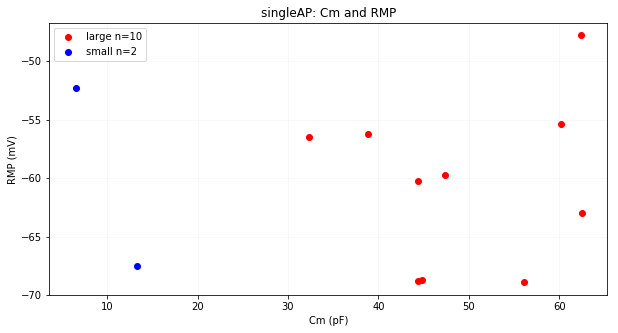

In [910]:
#wtap:plot Cm and RMP
#Creates just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 5))
#plot
lcount = sum(dfap['size of neuron']=='l')
scount = sum(dfap['size of neuron']=='s')
ax.scatter(x=dfap[dfap['size of neuron']=='l']['Cm (pF)'],y=dfap[dfap['size of neuron']=='l']['RMP (mV)'],c='r',label = 'large n='+str(lcount))
ax.scatter(x=dfap[dfap['size of neuron']=='s']['Cm (pF)'],y=dfap[dfap['size of neuron']=='s']['RMP (mV)'],c='b',label = 'small n='+str(scount))
ax.legend()#gives legend
ax.set_xlabel('Cm (pF)')
ax.set_ylabel('RMP (mV)')
ax.set_title('singleAP: Cm and RMP')
ax.grid(which ='major',alpha=0.1)
plt.show()
fig.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/singleAPCmRMP.png')


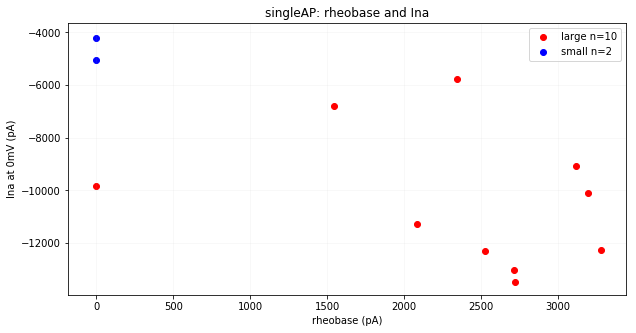

In [911]:
#wtap:plot rheobase and Ina at 0mV (pA)
#Creates just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 5))
#plot
lcount = sum(dfap['size of neuron']=='l')
scount = sum(dfap['size of neuron']=='s')
ax.scatter(x=dfap[dfap['size of neuron']=='l']['rheobase (pA)'],y=dfap[dfap['size of neuron']=='l']['Ina at 0mV (pA)'],c='r',label = 'large n='+str(lcount))
ax.scatter(x=dfap[dfap['size of neuron']=='s']['rheobase (pA)'],y=dfap[dfap['size of neuron']=='s']['Ina at 0mV (pA)'],c='b',label = 'small n='+str(scount))
ax.legend()#gives legend
ax.set_xlabel('rheobase (pA)')
ax.set_ylabel('Ina at 0mV (pA)')
ax.set_title('singleAP: rheobase and Ina')
ax.grid(which ='major',alpha=0.1)
plt.show()
fig.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/singleAPrheobaseIna.png')


### From figures above, the standard for selecting large single AP neuron: 
1. Ina>6000pA
2. RMP<-55mV (before correction)

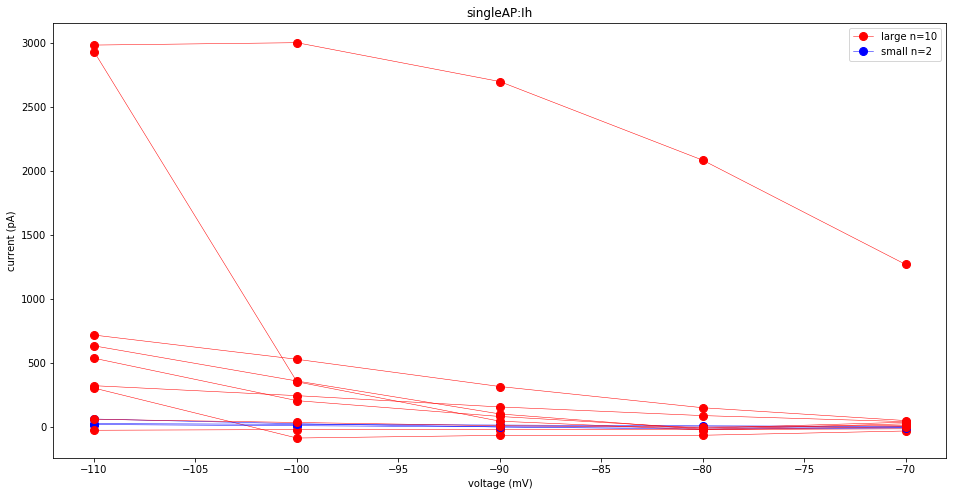

In [912]:
#dfap Ih:
#remove null in Ih
dfap = dfap[pd.notnull(dfap['Ih (pA)'])]
lcount = sum(np.array(dfap['size of neuron']=='l'))
scount = sum(np.array(dfap['size of neuron']=='s'))
plt.figure(figsize=(16,8))
for cell in dfap.index[1:]:#ignore the first row, some how numeric list becomes a string
    if dfap.loc[cell,'size of neuron']=='l':
        label = 'large n='
        plt.plot(dfap.loc[cell,'Ih voltage (mV)'],dfap.loc[cell,'Ih (pA)'], marker='o', color='r'
                 ,linewidth=0.5,markersize=8,label = label+str(lcount) if cell =='18518cell5' else "")#add L example index
    else:
        label = 'small n='
        plt.plot(dfap.loc[cell,'Ih voltage (mV)'],dfap.loc[cell,'Ih (pA)'], marker='o', color='b'
                 ,linewidth=0.5,markersize=8,label = label+str(scount) if cell =='18517cell5' else "")#add S example index
    


plt.axis('auto')
plt.xlabel('voltage (mV)')
plt.ylabel('current (pA)')
plt.legend()
plt.title('singleAP:Ih')
plt.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/singleAPIh.png')

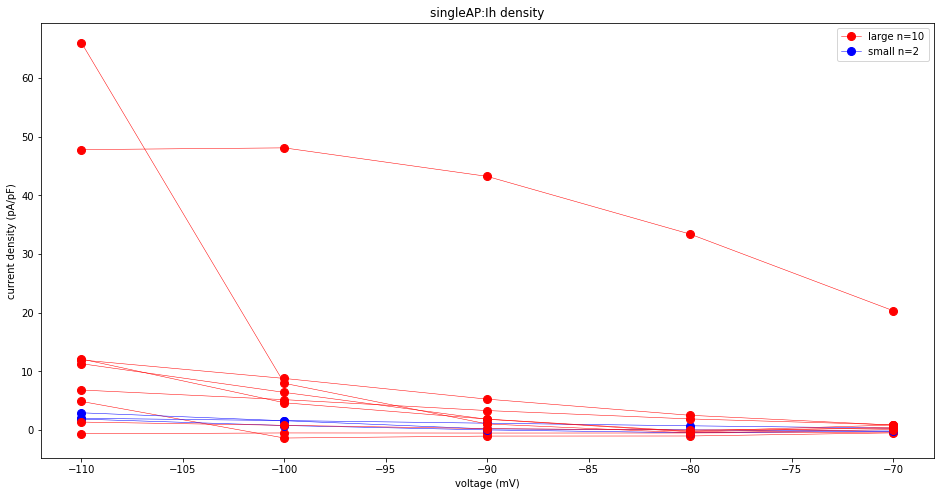

In [913]:
#dfap Ih density:
#remove null in Ih
dfap = dfap[pd.notnull(dfap['Ih (pA)'])]
lcount = sum(np.array(dfap['size of neuron']=='l'))
scount = sum(np.array(dfap['size of neuron']=='s'))
plt.figure(figsize=(16,8))
for cell in dfap.index[1:]:#ignore the first row, some how numeric list becomes a string
    if dfap.loc[cell,'size of neuron']=='l':
        label = 'large n='
        Ihlist= dfap.loc[cell,'Ih (pA)']
        Cm = dfap.loc[cell,'Cm (pF)']
        denIhlist = [x / Cm for x in Ihlist]
        plt.plot(dfap.loc[cell,'Ih voltage (mV)'],denIhlist, marker='o', color='r'
                 ,linewidth=0.5,markersize=8,label = label+str(lcount) if cell =='18518cell5' else "")#add L example index
    else:
        label = 'small n='
        Ihlist= dfap.loc[cell,'Ih (pA)']
        Cm = dfap.loc[cell,'Cm (pF)']
        denIhlist = [x / Cm for x in Ihlist]
        plt.plot(dfap.loc[cell,'Ih voltage (mV)'],denIhlist, marker='o', color='b'
                 ,linewidth=0.5,markersize=8,label = label+str(scount) if cell =='18517cell5' else "")#add S example index
    


plt.axis('auto')
plt.xlabel('voltage (mV)')
plt.ylabel('current density (pA/pF)')
plt.legend()
plt.title('singleAP:Ih density')
plt.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/singleAPIhden.png')

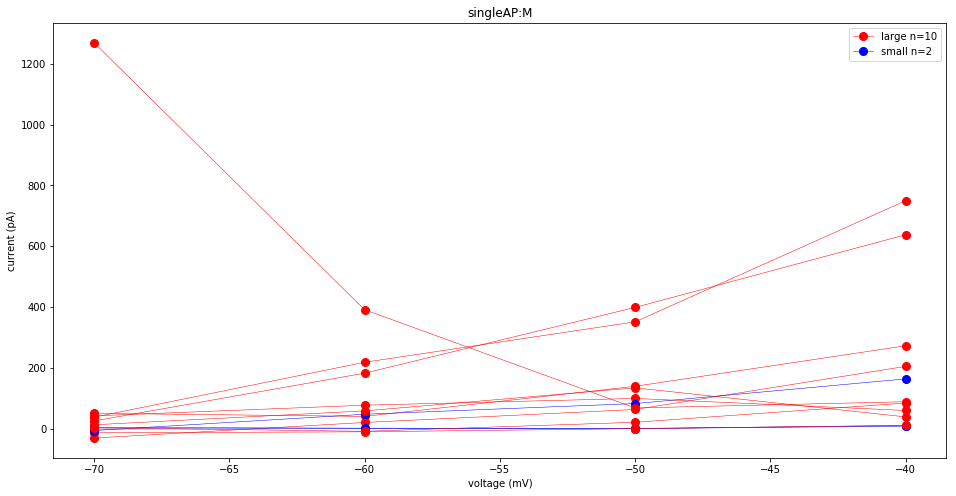

In [907]:
#dfap M:
#remove null in M
dfap = dfap[pd.notnull(dfap['M current(pA)'])]
lcount = sum(np.array(dfap['size of neuron']=='l'))
scount = sum(np.array(dfap['size of neuron']=='s'))
plt.figure(figsize=(16,8))
for cell in dfap.index[1:]:#ignore the first row, some how numeric list becomes a string
    if dfap.loc[cell,'size of neuron']=='l':
        label = 'large n='
        plt.plot(dfap.loc[cell,'M current voltage (mV)'],dfap.loc[cell,'M current(pA)'], marker='o', color='r'
                 ,linewidth=0.5,markersize=8,label = label+str(lcount) if cell =='18518cell5' else "")#add L example index
    else:
        label = 'small n='
        plt.plot(dfap.loc[cell,'M current voltage (mV)'],dfap.loc[cell,'M current(pA)'], marker='o', color='b'
                 ,linewidth=0.5,markersize=8,label = label+str(scount) if cell =='18517cell5' else "")#add S example index
    


plt.axis('auto')
plt.xlabel('voltage (mV)')
plt.ylabel('current (pA)')
plt.legend()
plt.title('singleAP:M')
plt.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/singleAPM.png')

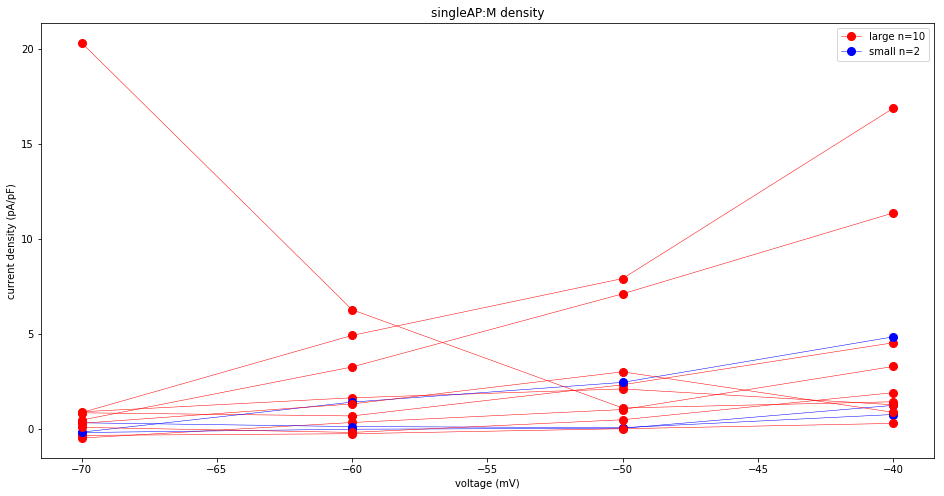

In [908]:
#dfap M density:
#remove null in Ih
dfap = dfap[pd.notnull(dfap['M current(pA)'])]
lcount = sum(np.array(dfap['size of neuron']=='l'))
scount = sum(np.array(dfap['size of neuron']=='s'))
plt.figure(figsize=(16,8))
for cell in dfap.index[1:]:#ignore the first row, some how numeric list becomes a string
    if dfap.loc[cell,'size of neuron']=='l':
        label = 'large n='
        Mlist= dfap.loc[cell,'M current(pA)']
        Cm = dfap.loc[cell,'Cm (pF)']
        denMlist = [x / Cm for x in Mlist]
        plt.plot(dfap.loc[cell,'M current voltage (mV)'],denMlist, marker='o', color='r'
                 ,linewidth=0.5,markersize=8,label = label+str(lcount) if cell =='18518cell5' else "")#add L example index
    else:
        label = 'small n='
        Mlist= dfap.loc[cell,'M current(pA)']
        Cm = dfap.loc[cell,'Cm (pF)']
        denMlist = [x / Cm for x in Mlist]
        plt.plot(dfap.loc[cell,'M current voltage (mV)'],denMlist, marker='o', color='b'
                 ,linewidth=0.5,markersize=8,label = label+str(scount) if cell =='18517cell5' else "")#add S example index
    


plt.axis('auto')
plt.xlabel('voltage (mV)')
plt.ylabel('current density (pA/pF)')
plt.legend()
plt.title('singleAP:M density')
plt.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/singleAPMden.png')

## shank plot

In [ ]:
#Shank:plot Cm and Rin

#update dfshnk
dfshnk = df[df['genotype'] != 'WT']
#Creates just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 5))
#plot

ax.scatter(x=dfshnk[dfshnk['genotype']=='412.2']['Cm (pF)'],y=dfshnk[dfshnk['genotype']=='412.2']['Rin (Mohm)'],c='r',label = 'mouse#2')
ax.scatter(x=dfshnk[dfshnk['genotype']=='412.3']['Cm (pF)'],y=dfshnk[dfshnk['genotype']=='412.3']['Rin (Mohm)'],c='b',label = 'mouse#3')
ax.legend()#gives legend
ax.set_xlabel('Cm (pF)')
ax.set_ylabel('Rin (Mohm)')
ax.set_title('Shank: Cm and Rin')
ax.grid(which ='major',alpha=0.1)
plt.show()
fig.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/shnkCmRin.png')

In [ ]:
dfshnk

In [ ]:
#Shank:plot Cm and rheobase pA

#update dfshnk
dfshnk = df[df['genotype'] != 'WT']
#Creates just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 5))
#plot

ax.scatter(x=dfshnk[dfshnk['genotype']=='412.2']['Cm (pF)'],y=dfshnk[dfshnk['genotype']=='412.2']['rheobase (pA) 500ms'],c='r',label = 'mouse#2')
ax.scatter(x=dfshnk[dfshnk['genotype']=='412.3']['Cm (pF)'],y=dfshnk[dfshnk['genotype']=='412.3']['rheobase (pA) 500ms'],c='b',label = 'mouse#3')
ax.legend()#gives legend
ax.set_xlabel('Cm (pF)')
ax.set_ylabel('current (pA)')
ax.set_title('Shank: Cm and rheobase(500ms current)')
ax.grid(which ='major',alpha=0.1)
plt.show()
fig.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/shnkCmrheo500ms.png')

In [ ]:
#Shank:plot 'Ina at 0mV (pA)' 'Rs (Mohms)'
#Creates just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 5))
#plot
ax.scatter(x=dfshnk[dfshnk['genotype']=='412.2']['Ina at 0mV (pA)'],y=dfshnk[dfshnk['genotype']=='412.2']['Rs (Mohms)'],c='r',label = 'mouse#2')
ax.scatter(x=dfshnk[dfshnk['genotype']=='412.3']['Ina at 0mV (pA)'],y=dfshnk[dfshnk['genotype']=='412.3']['Rs (Mohms)'],c='b',label = 'mouse#3')
ax.legend()#gives legend
ax.set_xlabel('Ina at 0mV (pA)')
ax.set_ylabel('Rs (Mohms)')
ax.set_title('Shank: Ina at 0mV and Rs')
ax.grid(which ='major',alpha=0.1)
plt.show()
fig.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/shnkRsIna.png')

In [ ]:
#shank Ih:
plt.figure(figsize=(16,8))
for cell in dfshnk.index:#ignore the first row, some how numeric list becomes a string
    if dfshnk.loc[cell,'genotype']=='412.2':
        label = 'mouse#2'
        plt.plot(dfshnk.loc[cell,'Ih voltage (mV)'],dfshnk.loc[cell,'Ih (pA)'], marker='o', color='r',linewidth=0.5,markersize=8,label = label if cell =='18414cell20' else "")#add 412.2 example index
    else:
        label = 'mouse#3'
        plt.plot(dfshnk.loc[cell,'Ih voltage (mV)'],dfshnk.loc[cell,'Ih (pA)'], marker='o', color='b',linewidth=0.5,markersize=8,label = label if cell =='18414cell21' else "")#add 413.3 example index
    


#plt.axis('auto')
plt.xlabel('voltage (mV)')
plt.ylabel('current (pA)')
plt.legend()
plt.title('Shank: Ih')
plt.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/shnkIh.png')

In [ ]:
#shank Ih density:
plt.figure(figsize=(16,8))
for cell in dfshnk.index:#ignore the first row, some how numeric list becomes a string
    if dfshnk.loc[cell,'genotype']=='412.2':
        label = 'mouse#2'
        Ihlist= dfshnk.loc[cell,'Ih (pA)']
        Cm = dfshnk.loc[cell,'Cm (pF)']
        denIhlist = [x / Cm for x in Ihlist]
        plt.plot(dfshnk.loc[cell,'Ih voltage (mV)'],denIhlist, marker='o', color='r',linewidth=0.5,markersize=8,label = label if cell =='18414cell20' else "")#add 412.2 example index
    else:
        label = 'mouse#3'
        Ihlist= dfshnk.loc[cell,'Ih (pA)']
        Cm = dfshnk.loc[cell,'Cm (pF)']
        denIhlist = [x / Cm for x in Ihlist]
        plt.plot(dfshnk.loc[cell,'Ih voltage (mV)'],denIhlist, marker='o', color='b',linewidth=0.5,markersize=8,label = label if cell =='18414cell21' else "")#add 413.3 example index
    


#plt.axis('auto')
plt.xlabel('voltage (mV)')
plt.ylabel('current density (pA/pF)')
plt.legend()
plt.title('Shank: Ih density')
plt.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/shnkIhden.png')

In [ ]:
#shank M:
plt.figure(figsize=(16,8))
for cell in dfshnk.index:#ignore the first row, some how numeric list becomes a string
    if dfshnk.loc[cell,'genotype']=='412.2':
        label = 'mouse#2'
        plt.plot(dfshnk.loc[cell,'M current voltage (mV)'],dfshnk.loc[cell,'M current(pA)'], marker='o', color='r',linewidth=0.5,markersize=8,label = label if cell =='18414cell20' else "")#add 412.2 example index
    else:
        label = 'mouse#3'
        plt.plot(dfshnk.loc[cell,'M current voltage (mV)'],dfshnk.loc[cell,'M current(pA)'], marker='o', color='b',linewidth=0.5,markersize=8,label = label if cell =='18414cell21' else "")#add 413.3 example index
    


#plt.axis('auto')
plt.xlabel('voltage (mV)')
plt.ylabel('current (pA)')
plt.legend()
plt.title('Shank: M current')
plt.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/shnkM.png')

In [ ]:
#shank M density:
plt.figure(figsize=(16,8))
for cell in dfshnk.index:#ignore the first row, some how numeric list becomes a string
    if dfshnk.loc[cell,'genotype']=='412.2':
        label = 'mouse#2'
        Mlist= dfshnk.loc[cell,'M current(pA)']
        Cm = dfshnk.loc[cell,'Cm (pF)']
        denMlist = [x / Cm for x in Ihlist]
        plt.plot(dfshnk.loc[cell,'M current voltage (mV)'],denMlist, marker='o', color='r',linewidth=0.5,markersize=8,label = label if cell =='18414cell20' else "")#add 412.2 example index
    else:
        label = 'mouse#3'
        Ihlist= dfshnk.loc[cell,'M current(pA)']
        Cm = dfshnk.loc[cell,'Cm (pF)']
        denMlist = [x / Cm for x in Ihlist]
        plt.plot(dfshnk.loc[cell,'M current voltage (mV)'],denMlist, marker='o', color='b',linewidth=0.5,markersize=8,label = label if cell =='18414cell21' else "")#add 413.3 example index
    


#plt.axis('auto')
plt.xlabel('voltage (mV)')
plt.ylabel('current density (pA/pF)')
plt.legend()
plt.title('Shank: Mcurrent density')
plt.savefig('/Users/bearzhang/Desktop/Beanlab/py/Beanlab/IhMfig/shnkMden.png')

In [ ]:
#this block is to plot M with matplotlib
plt.plot(df.loc['18518cell3','M current voltage (mV)'],df.loc['18518cell3','M current(pA)'], marker='o', color='r')
plt.axis('auto')
plt.xlabel('voltage (mV)')
plt.ylabel('current (pA)')
plt.title('M')

In [ ]:
# This block is to plot an interactive scatter plot use R, plotly package. 
#By now, I found plotly in R is more useful than python.

'''
#install R rpy2
#!conda install --yes --prefix {sys.prefix} rpy2
#%load_ext rpy2.ipython
%R require(ggplot2)
%R require(plotly)
#R import data from python
%%R -i df'''


In [ ]:
#decide a sweep you want to work on and show the swp ,given
SwpNm = int(input('Enter the number of sweep you are interested in: '+'from '+brkthru.ID+cellID))
brkthru.setSweep(SwpNm-1) #in python sweeps numbers start at 0, IgoR at 1
voltage=brkthru.dataC
time=brkthru.dataX
current=brkthru.dataY

plt.figure('voltage',figsize=(15,8))
plt.plot(time,voltage, color = 'k')
plt.xlabel('time (s)', fontsize=14, color='black')
plt.ylabel('command (mV)', fontsize=14, color='black')
plt.title(date+cellID+'voltage at sweep'+str(SwpNm),fontsize=14, color='black')

plt.figure('Ina at 0mV current',figsize=(15,8))
plt.plot(time,current, color ='r')
plt.xlabel('time (s)', fontsize=14, color='black')
plt.ylabel('current (pA)', fontsize=14, color='black')
plt.title(date+cellID+'current at sweep'+str(SwpNm),fontsize=14, color='black')